<h1>Read and pre-proccess data</h1>

In [29]:
import pandas as pd
import numpy as np

data = pd.read_csv("Dataset/BOM.csv")
data = data.dropna()  

<h1>encoding and set target</h1>

In [30]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

label_enc = LabelEncoder()
for col in data.select_dtypes(include='object').columns:
    data[col] = label_enc.fit_transform(data[col])
    
y = data['RainTomorrow']
X = data.drop(columns=['RainTomorrow'])


<h1>normalizing</h1>

In [31]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

<h1>split train/test</h1>

In [32]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

<h1>evaluate f1 score</h1>

In [33]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score

f1_scores = []
neighbors = range(1, 21)

for k in neighbors:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    f1 = f1_score(y_test, y_pred)
    f1_scores.append(f1)

<h1>finding best K based on F1 scores:</h1>

In [34]:
best_k = neighbors[np.argmax(f1_scores)]
best_f1 = max(f1_scores)
print(f"Best K: {best_k}, F1 Score: {best_f1:.4f}")

Best K: 15, F1 Score: 0.5965


ploting the F1 scores based on different K's

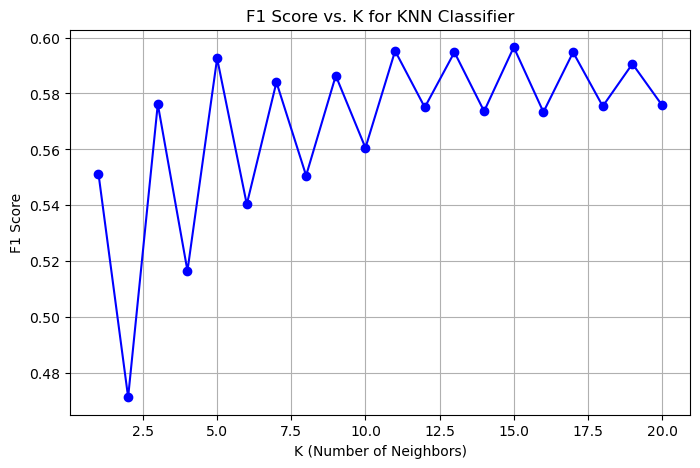

In [35]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.plot(neighbors, f1_scores, marker='o', linestyle='-', color='blue')
plt.xlabel('K (Number of Neighbors)')
plt.ylabel('F1 Score')
plt.title('F1 Score vs. K for KNN Classifier')
plt.grid(True)
plt.show()


<h1>Question:</h1>

<h2>Which is better to real time inference?</h2>

در کا ان ان هیچ “مدل یادگیری‌شده” وجود ندارد. تمام داده‌ها ذخیره می‌شوند و هر بار که پیش‌بینی انجام می‌شود باید فاصله نمونه جدید تا همه‌ی داده‌های آموزشی محاسبه شود.
در داده‌های حجیم، این فرایند زمان‌بر و پرهزینه است.
همچنین به حافظه زیادی نیاز دارد.
الگوریتم هایی مثل لاجستیک رگراسیون یا شبکه های عصبی و یا جنگل تصادفی برای این کار ها مناسبند چون بعد از اموزش، پیشبینی سزیعتری دارند.